### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils.util import get_data, plot_data, get_bollinger_bands
from datetime import datetime
from itertools import izip

### Initialization

In [2]:
date_start = '2007-12-31'
date_end = '2009-12-31'
folder_name = 'data'
out_folder_name = 'out'
out_file_name = 'bollingerstrategy' 
stock = 'IBM'

dates = pd.date_range(date_start, date_end)

### Load Stock Data

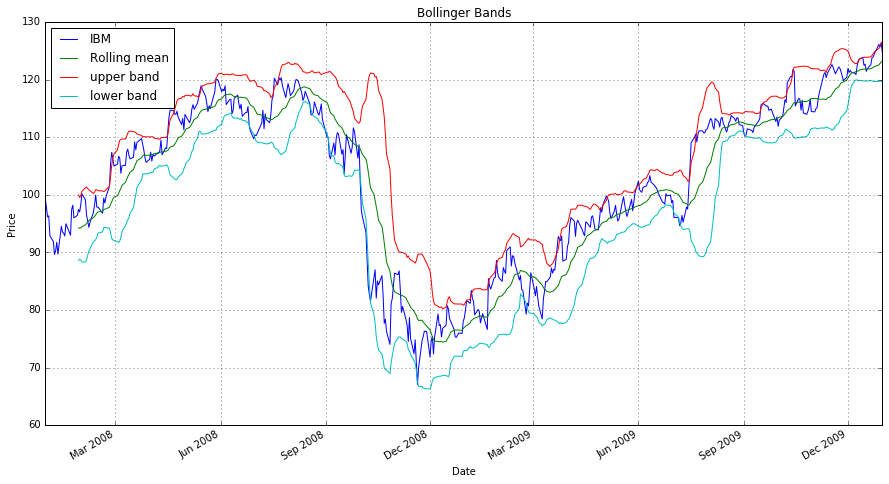

,IBM,rolling_mean,upper_band,lower_band
2007-12-31,99.27,NaN,NaN,NaN
2008-01-02,96.14,NaN,NaN,NaN
2008-01-03,96.34,NaN,NaN,NaN
2008-01-04,92.87,NaN,NaN,NaN
2008-01-07,91.88,NaN,NaN,NaN


In [3]:
prices_all = get_data([stock], dates)
df = get_bollinger_bands(prices_all[stock])
df.head()

### Apply Bollinger Strategy

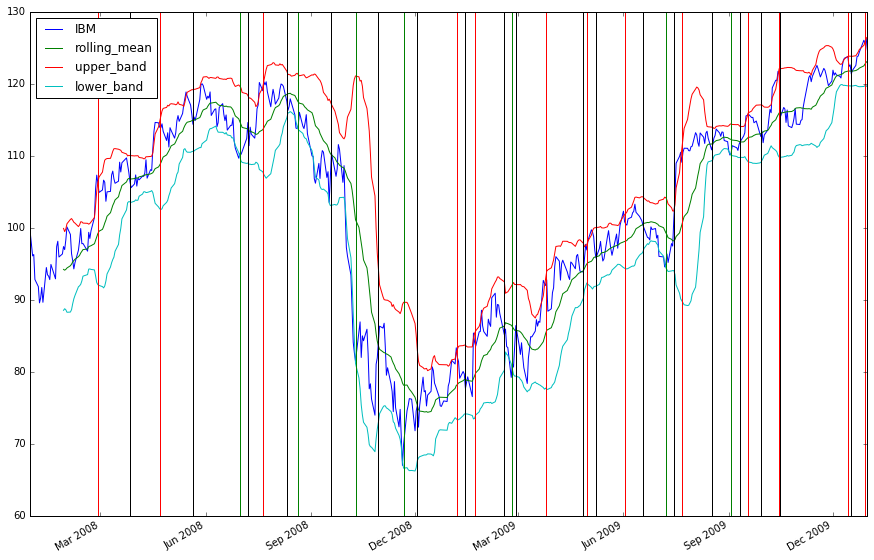

In [4]:
long_entries = []
short_entries = []
exits = []
holding_long = False
holding_short = False

time_now = datetime.now().strftime('%Y%m%d_%H%M%S')
file_name = os.path.join(out_folder_name, '{}_{}.csv'.format(out_file_name, time_now))

f = open(file_name,'w')
f.write("Date,Symbol,Order,Shares\n")

for (index1, row1),(index2, row2) in izip(df.iterrows(), df[1:].iterrows()):
    #print index1, row1['IBM'], index2, row2['IBM']
    
    # Signal to buy
    if (row1[stock] < row1['lower_band'] and row2[stock] > row2['lower_band'] and not holding_long):
        long_entries.append(str(index2)[:10])
        holding_long = True
        f.write("{},{},BUY,100\n".format(str(index2)[:10], stock))

        
    # Signal to sell
    elif (row1[stock] < row1['rolling_mean'] and row2[stock] > row2['rolling_mean'] and holding_long):
        exits.append(str(index2)[:10])
        holding_long = False
        f.write("{},{},SELL,100\n".format(str(index2)[:10], stock))
        
    # Signal to start shorting
    elif (row1[stock] > row1['upper_band'] and row2[stock] < row2['upper_band'] and not holding_short):
        short_entries.append(str(index2)[:10])
        holding_short = True    
        f.write("{},{},SELL,100\n".format(str(index2)[:10], stock))
        
    # Signal to stop shorting     
    elif (row1[stock] > row1['rolling_mean'] and row2[stock] < row2['rolling_mean'] and holding_short):
        exits.append(str(index2)[:10])
        holding_short = False     
        f.write("{},{},BUY,100\n".format(str(index2)[:10], stock))

f.close()       

# Plot Strategy
ax = df.plot(figsize=(15, 10))

for day in long_entries:
    ax.axvline(x=day, color='green')
for day in short_entries:
    ax.axvline(x=day, color='red')
for day in exits:
    ax.axvline(x=day, color='black')

plt.show()